<h4 style="color:purple">K-Mean CLUSTERING</h4>

<p>K-means clustering is a popular unsupervised machine learning algorithm used for data clustering and pattern recognition. The goal of K-means is to partition a given dataset into a fixed number of clusters (K) by minimizing the sum of squared distances between the data points and their assigned cluster centers.</p>
<p>The algorithm proceeds in the following steps:</p>
<ol style="color:green">
<li><b>Initialization:</b> Choose K cluster centers randomly from the data points.</li>
<li><b>Assignment:</b> Assign each data point to the nearest cluster center based on Euclidean distance.</li>
<li><b>Update:</b> Recalculate the cluster centers as the mean of the data points assigned to each cluster.</li>
<li><b>Repeat:</b> Repeat steps 2 and 3 until convergence (when the cluster assignments no longer change or a maximum number of iterations is reached).</li>
    </ol>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

<h4 style="color:purple">Mall Customer Segmentation Data</h4>

In [48]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Here we just considering two attribute from dataset 

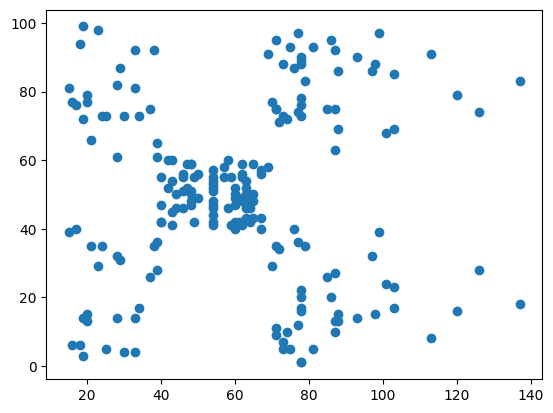

In [49]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

<h4 style="color:purple">ELBOW TECHNIQUE</h4>

<P>The Elbow Method is a popular technique used in K-means clustering to help determine the optimal number of clusters to use for a given dataset. The method involves plotting the within-cluster sum of squared distances (WSS) against the number of clusters (K), and looking for the "elbow" point in the curve where the rate of decrease in WSS starts to level off.</P>

The basic steps for using the Elbow Method are as follows:
<OL style="color:purple">
    <LI>Run K-means clustering with a range of K values (e.g., 1 to 10).</LI>
<LI>For each K value, calculate the WSS (the sum of squared distances between each point and its assigned cluster center).</LI>
<LI>Plot the K values against the corresponding WSS values.</LI>
<LI>Look for the "elbow" point in the curve, which indicates the point of diminishing returns in terms of decreasing WSS with increasing K.</LI>
    </OL>

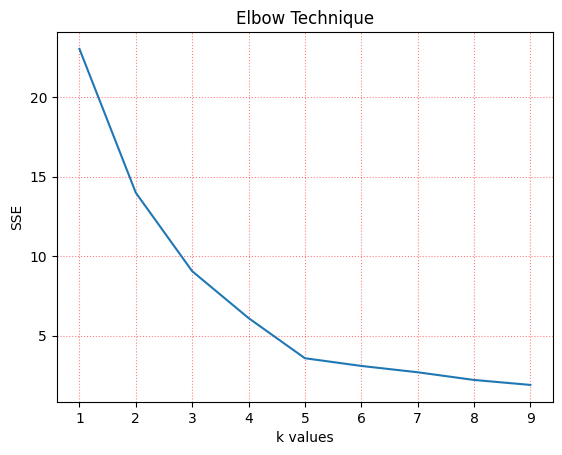

In [60]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)
plt.xlabel("k values")
plt.ylabel("SSE")
plt.title("Elbow Technique")
plt.grid(color="red",linestyle=":",alpha=0.5)
import warnings
warnings.filterwarnings('ignore')

<h4 style="color:purple">PREPROCESSING</h4>

MinMaxScaler is a data preprocessing technique used in machine learning to scale numeric data features between a specified range, typically between 0 and 1. This is achieved by subtracting the minimum value from each feature value and dividing by the range.

In [61]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

*y_predict have now the cluster group for each customer and now we can plot each group on scatter*

In [62]:
km=KMeans(n_clusters=5)
y_predict=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predict

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

**Centroid of each Cluster**

In [73]:
km.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.33029751, 0.49508692]])

In [63]:
df['Customer_Group']=y_predict
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer_Group
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,1


**seperating each group of customer in a separate dataframe**

In [64]:
df0=df[df.Customer_Group==0]
df1=df[df.Customer_Group==1]
df2=df[df.Customer_Group==2]
df3=df[df.Customer_Group==3]
df4=df[df.Customer_Group==4]

<h4 style="color:purple">SCATTER PLOT</h4>

Text(0.5, 1.0, 'Customer Clustering')

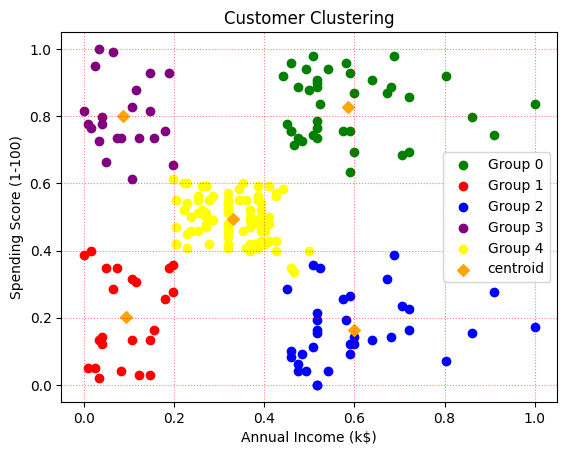

In [72]:
plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],color="green",label="Group 0")
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color="red",label="Group 1")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color="blue",label="Group 2")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color="purple",label="Group 3")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color="yellow",label="Group 4")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='D',label='centroid')

plt.legend()
plt.grid(color="red",linestyle=":",alpha=0.5)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Clustering")

<h4 style="color:purple">CONCLUSION</h4>

<OL>
    <li><b style="color:green">High-income, high-spending customers:</b> This cluster might represent customers who are financially comfortable and enjoy spending money on luxury goods and services.</li>

 <li><b  style="color:blue">High-income, low-spending customers:</b> This cluster might represent customers who are financially secure but prefer to save their money or spend it on practical necessities rather than luxury items.</li>

 <li><b style="color:yellow">Medium-income, medium-spending customers:</b> This cluster might represent customers who are financially stable but may not prioritize spending on luxury goods and services. These customers may have specific preferences and spending habits that distinguish them from the other clusters.</li>

 <li><b  style="color:purple">Low-income, high-spending customers:</b> This cluster might represent customers who are willing to spend a significant portion of their income on goods and services that they enjoy, even if they have limited financial resources.</li>

 <li><b style="color:red">Low-income, low-spending customers:</b> This cluster might represent customers who are more focused on saving money and minimizing their expenses, either out of necessity or personal preference.</li>

</OL>




